In [52]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
import seaborn as sns

import matplotlib.pylab as pylab

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
from IPython.display import display
pd.options.display.max_columns = None
from sklearn.linear_model import LinearRegression, LassoCV, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor




In [2]:
import warnings
warnings.filterwarnings('ignore')

# Reading data

In [3]:
df_city = pd.read_csv("GlobalLandTemperaturesByCity.csv")

In [4]:
df_country = pd.read_csv("GlobalLandTemperaturesByCountry.csv")

In [5]:
print ('Number of rows in city data:', df_city.shape[0])
print ('Number of columns in city data:', df_city.shape[1])
print ('Columns in city data:')
print(list(df_city.columns))

Number of rows in city data: 8599212
Number of columns in city data: 7
Columns in city data:
['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City', 'Country', 'Latitude', 'Longitude']


In [6]:
print ('Number of rows in country data:', df_country.shape[0])
print ('Number of columns in country data:', df_country.shape[1])
print ('Columns in country data:')
print(list(df_country.columns))

Number of rows in country data: 577462
Number of columns in country data: 4
Columns in country data:
['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country']


In [7]:
df_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [8]:
df_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


# Data Formatting

In [9]:
# Format the datetime column 
df_city['dt'] = pd.to_datetime(df_city['dt']) 
df_country['dt'] = pd.to_datetime(df_country['dt']) 

In [10]:
# Extract year, month, decade: City data
df_city['month'] = df_city['dt'].apply(lambda x: x.month)
df_city['year'] = df_city['dt'].apply(lambda x: x.year)
df_city['decade'] = df_city['year'].apply(lambda x: int(np.floor(x/10)*10))   # Decade of 1856 is 1850

In [11]:
# Extract year, month, decade : Country data
df_country['month'] = df_country['dt'].apply(lambda x: x.month)
df_country['year'] = df_country['dt'].apply(lambda x: x.year)
df_country['decade'] = df_country['year'].apply(lambda x: int(np.floor(x/10)*10))

In [12]:
df_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,month,year,decade
0,1743-11-01,4.384,2.294,Åland,11,1743,1740
1,1743-12-01,NaN,NaN,Åland,12,1743,1740
2,1744-01-01,NaN,NaN,Åland,1,1744,1740
3,1744-02-01,NaN,NaN,Åland,2,1744,1740
4,1744-03-01,NaN,NaN,Åland,3,1744,1740


In [13]:
# Extract the numeric value of Longitude and Lattitude in city data
df_city['longi'] = df_city['Longitude'].str.extract('([0-9,.]+)').astype('float')
df_city['latti'] = df_city['Latitude'].str.extract('([0-9,.]+)').astype('float')

In [14]:
df_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,month,year,decade,longi,latti
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,11,1743,1740,10.33,57.05
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,12,1743,1740,10.33,57.05
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1,1744,1740,10.33,57.05
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,2,1744,1740,10.33,57.05
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,3,1744,1740,10.33,57.05


In [15]:
df_city.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
month                                     int64
year                                      int64
decade                                    int64
longi                                   float64
latti                                   float64
dtype: object

# Data Cleaning: Missing values

In [16]:
# Which columns have missing values
print('Following columns have missing values in city data:', list(df_city.columns[df_city.isnull().any()]))

Following columns have missing values in city data: ['AverageTemperature', 'AverageTemperatureUncertainty']


In [17]:
print('Following columns have missing values in country data:', list(df_country.columns[df_country.isnull().any()]))

Following columns have missing values in country data: ['AverageTemperature', 'AverageTemperatureUncertainty']


In [18]:
# Replacing missing values by average of previous and next valid value
df_tmp = df_city[['AverageTemperature','AverageTemperatureUncertainty']]

In [19]:
df_city[['AverageTemperature','AverageTemperatureUncertainty']] =  df_tmp.where(df_tmp.notnull(), other=(df_tmp.fillna(method='ffill')+df_tmp.fillna(method='bfill'))/2)
# this next line is only for terminal nan case
df_city[['AverageTemperature','AverageTemperatureUncertainty']] = df_tmp.where(df_tmp.notnull(), other=(df_tmp.fillna(df_tmp.fillna(method='ffill'))))


In [20]:
# country data
df_tmp = df_country[['AverageTemperature','AverageTemperatureUncertainty']]
df_country[['AverageTemperature','AverageTemperatureUncertainty']] =  df_tmp.where(df_tmp.notnull(), other=(df_tmp.fillna(method='ffill')+df_tmp.fillna(method='bfill'))/2)
# this next line is only for terminal nan case
df_country[['AverageTemperature','AverageTemperatureUncertainty']] = df_tmp.where(df_tmp.notnull(), other=(df_tmp.fillna(df_tmp.fillna(method='ffill'))))


In [21]:
df_country[df_country.Country == 'Afghanistan'].groupby('decade').AverageTemperature.max()

decade
1830    26.877
1840    27.739
1850    27.194
1860    27.355
1870    27.422
1880    27.012
1890    26.709
1900    27.333
1910    27.644
1920    27.989
1930    27.784
1940    28.425
1950    27.455
1960    27.363
1970    27.552
1980    28.254
1990    28.533
2000    28.409
2010    28.205
Name: AverageTemperature, dtype: float64

# Task1: Which country has the most severe overall temperature change from decade to decade? Please elaborate on how you interpret severe change and decade to decade.

* Severe change = increase in maximum temparature over decades. 
* For a country, we take the max value of tempaerature in each decade. Then we take the (max value - min value) over decades. This defines temparature changes over decade to decade. 


In [22]:
y = df_country.groupby(['Country','decade']).AverageTemperature.max()

In [23]:
tmp ={}
for country in set(df_country.Country):
    tmp[country] = y[country].max() - y[country].min()

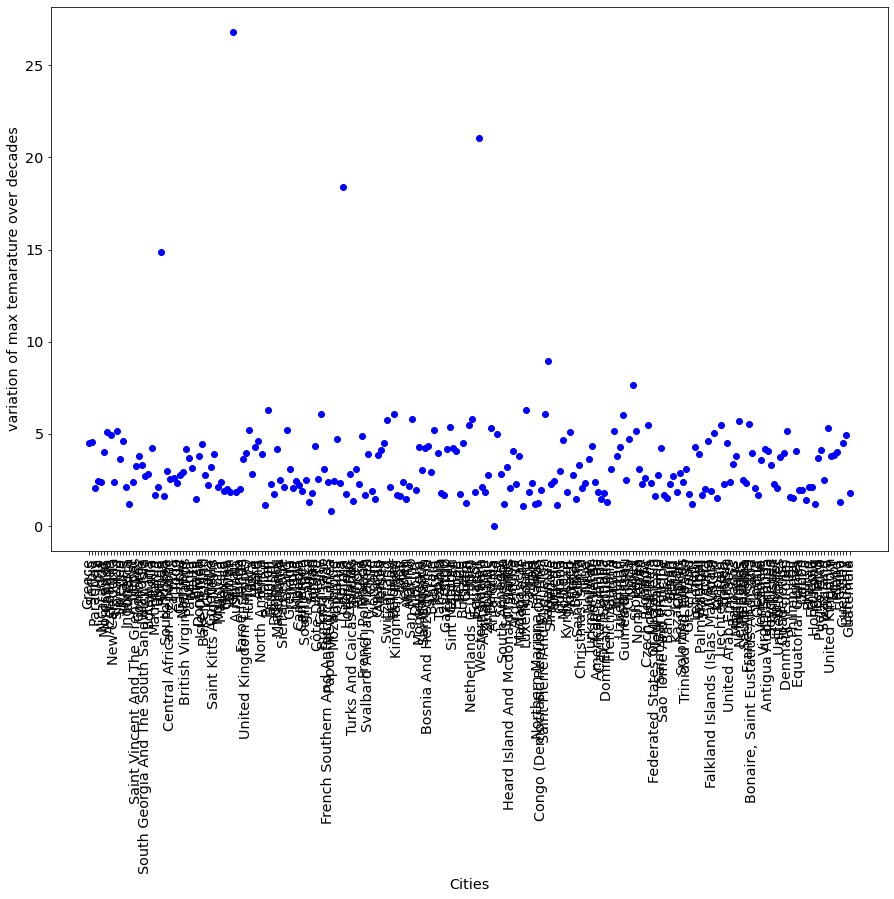

In [54]:
plt.plot(tmp.keys(), tmp.values(), 'bo')
plt.xticks(rotation=90)
plt.ylabel("variation of max temarature over decades")
plt.xlabel("Cities")
plt.show()

# Clearly there is anomaly in data. Discarding the outliars


In [25]:
# Clearly there is anomaly in data. Discarding the outliars
filtered_tmp = {k:v for k,v in tmp.items() if v < 7}

In [26]:
print(" Country with most severe overall temparature change:")
max(filtered_tmp, key=filtered_tmp.get)


 Country with most severe overall temparature change:


'Luxembourg'

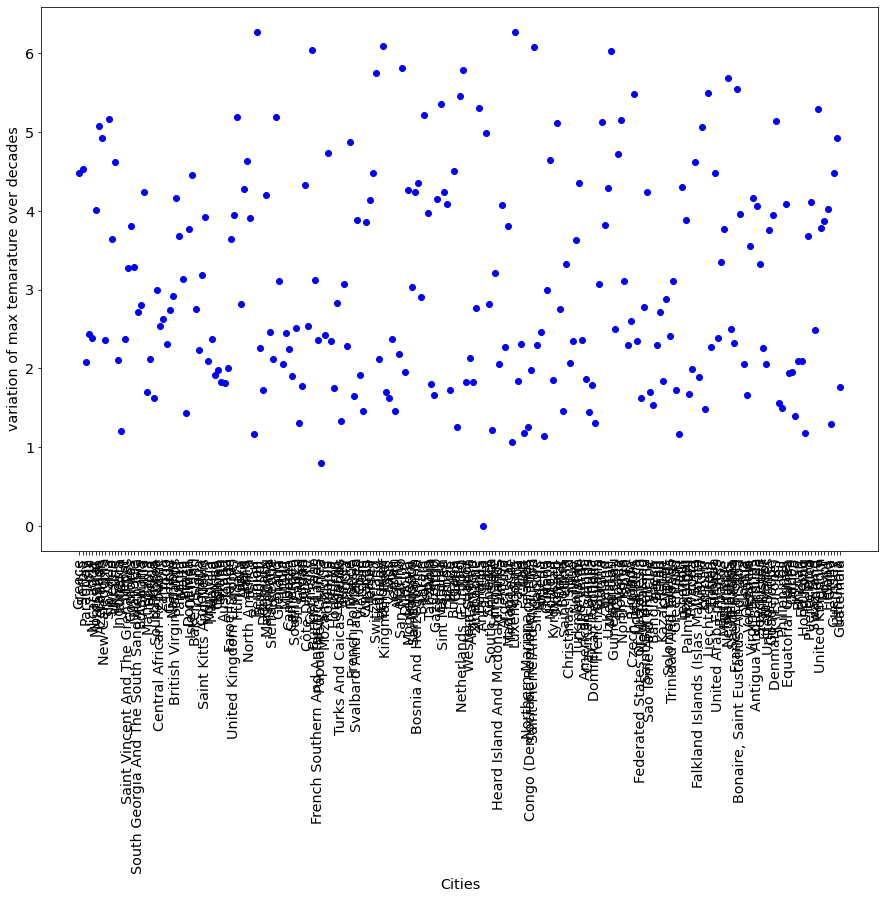

In [55]:
# Plot after removing outliars
plt.plot(filtered_tmp.keys(), filtered_tmp.values(), 'bo')
plt.xticks(rotation=90)
plt.ylabel("variation of max temarature over decades")
plt.xlabel("Cities")
plt.show()

# Task2: Write a function which returns N entries of cities which have the highest variability​ in AverageTemperature in a specified time range.

* Variablity = Standard deviation 

In [28]:
def top_n_city(data, start_date = '1500-01-01', end_date = '2022-01-01', n =4):
    """
    input: dataframe, start_date, end_date, n = a positive integer
    Output: Returns n entries of cities which have the highest variability (= standard deviation) 
    in AverageTemperature in a specified time range.
    """
    data = data[(data['dt'] >= pd.to_datetime(start_date)) & (data['dt'] <= pd.to_datetime(end_date))]
    tmp ={}
    for city, group in data.groupby('City'):
        tmp[city] = group.AverageTemperature.std()
    l = sorted(tmp, key=tmp.get)[:n]
    return l

In [29]:
start_date = '1990-1-1'

In [30]:
end_date = '2005-1-1'

In [31]:
print("Given time range:", start_date,",", end_date)
print("cities with highest variability in AverageTemperature")
top_n_city(df_city, start_date, end_date)

Given time range: 1990-1-1 , 2005-1-1
cities with highest variability in AverageTemperature


['Ternate', 'Bitung', 'Manado', 'Baturaja']

# Task 3: Plot the temperature development (and uncertainty) over time of the top 4 entries of your function for a given time period and save the plot as a .png file.

In [32]:
top_cities = top_n_city(df_city, start_date, end_date)

In [33]:
df = df_city[df_city.City.isin(top_cities)]

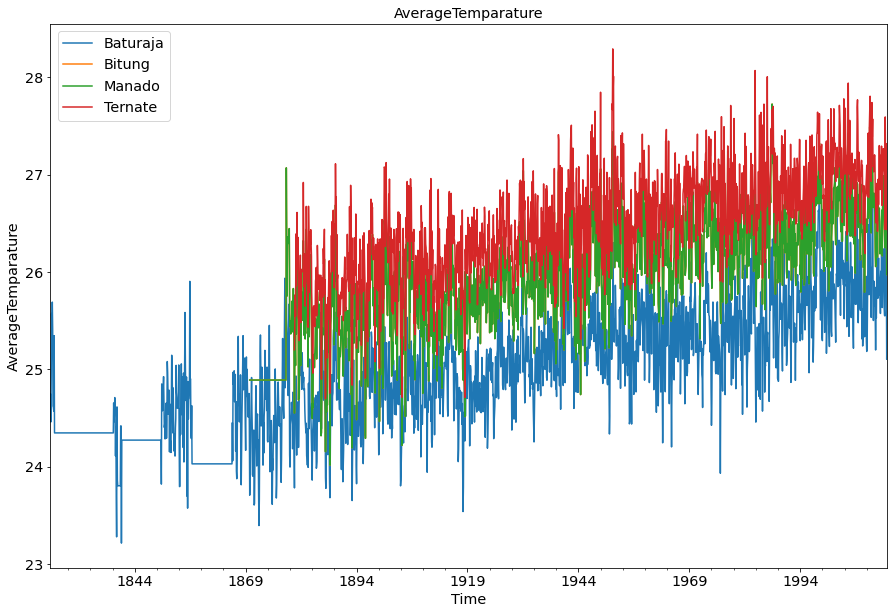

In [56]:
fig = plt.figure()

df.set_index('dt').groupby('City')['AverageTemperature'].plot(legend=True)
plt.ylabel('AverageTemparature')
plt.xlabel('Time')
fig.savefig('AverageTemperature.png')
plt.title ("AverageTemparature")
plt.show()

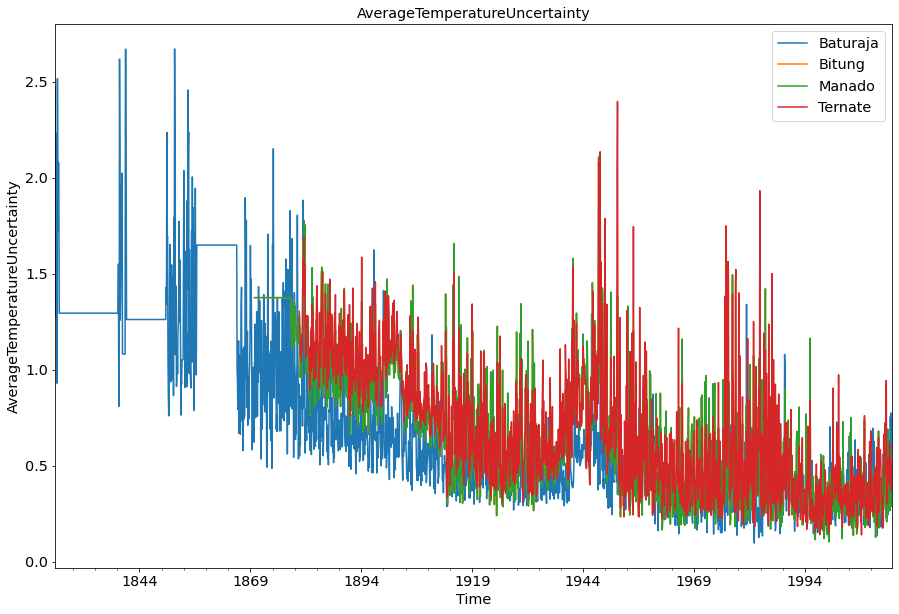

In [60]:
fig = plt.figure()
df.set_index('dt').groupby('City')['AverageTemperatureUncertainty'].plot(legend=True)
plt.ylabel('AverageTemperatureUncertainty')
plt.xlabel('Time')
fig.savefig('AverageTemperatureUncertainty.png')
plt.title("AverageTemperatureUncertainty")
plt.show()

# Task 4: Build a predictive model which forecasts the AverageTemperature of the 4 cities from the previous task until and including 2013-12-01

In [36]:
from sklearn.model_selection import train_test_split

In [58]:
# Running with full data taking long time. So taking a slice of the data. 
df_city1 = df_city[:40000]


# Preparing data for model

In [38]:
"""
We formulate the problem as a regression problem with "Window Method": to predict a value, we look at histroy
of previous 5 months (can be tuned). Also we add longitute and latitude as features.

"""

X = []
y = []
history_size = 5
for city, group in df_city1.groupby('City'):
    size = group.shape[0]
    for i in range(size - history_size - 1):
        values = np.array(group['AverageTemperature'][i:(i+history_size+1)])
        t = np.append(values[:-1],group[['longi', 'latti']].iloc[0])
        X.append(t)
        y.append(values[-1])



In [39]:
# train-test splitting
# test data = 33% of the given data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 


# Training different models

In [40]:
# Linear regression model
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression().fit(X_train, y_train)
print("R2 score of linear model:")
reg1.score(X_test, y_test)

R2 score of linear model:


0.9535137730839154

In [41]:
# Random Forest regression
reg2 = RandomForestRegressor(random_state=0).fit(X_train, y_train)
print("R2 score of Random Forest model:")

reg2.score(X_test, y_test)

R2 score of Random Forest model:


0.9811587128519021

In [42]:
# Ridge regression
reg3 = Ridge(random_state=0).fit(X_train, y_train)
print("R2 score of Ridge model:")

reg3.score(X_test, y_test)

R2 score of Ridge model:


0.953513792936463

In [43]:
#Gradient Boosting regression
reg4 = GradientBoostingRegressor().fit(X_train, y_train)
print("R2 score of Gradient Boosting model:")

reg4.score(X_test, y_test)


R2 score of Gradient Boosting model:


0.9727372105546097

# Plottting actual vs prediction

In [44]:
y_pred1 = reg1.predict(X_test)
y_pred2 = reg2.predict(X_test)
y_pred3 = reg3.predict(X_test)
y_pred4 = reg4.predict(X_test)

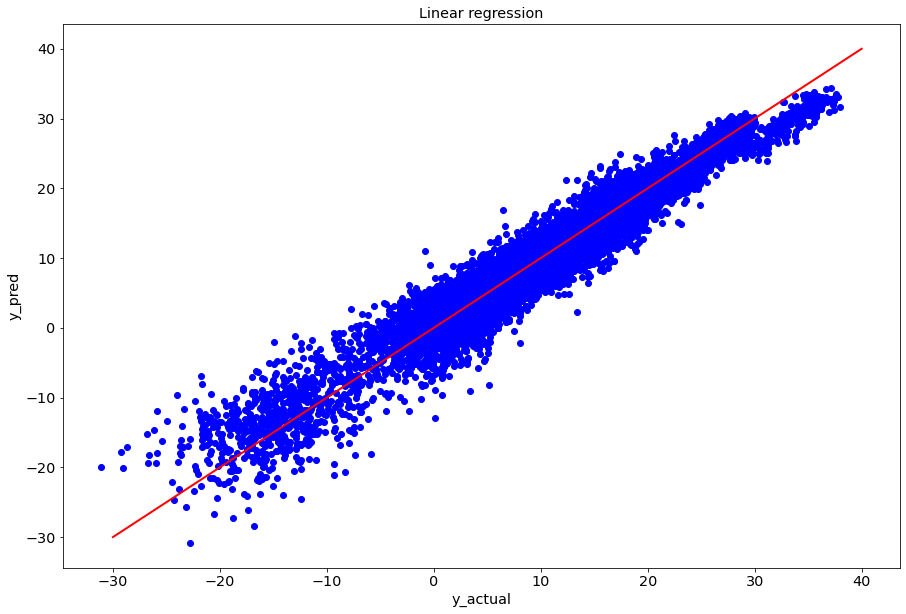

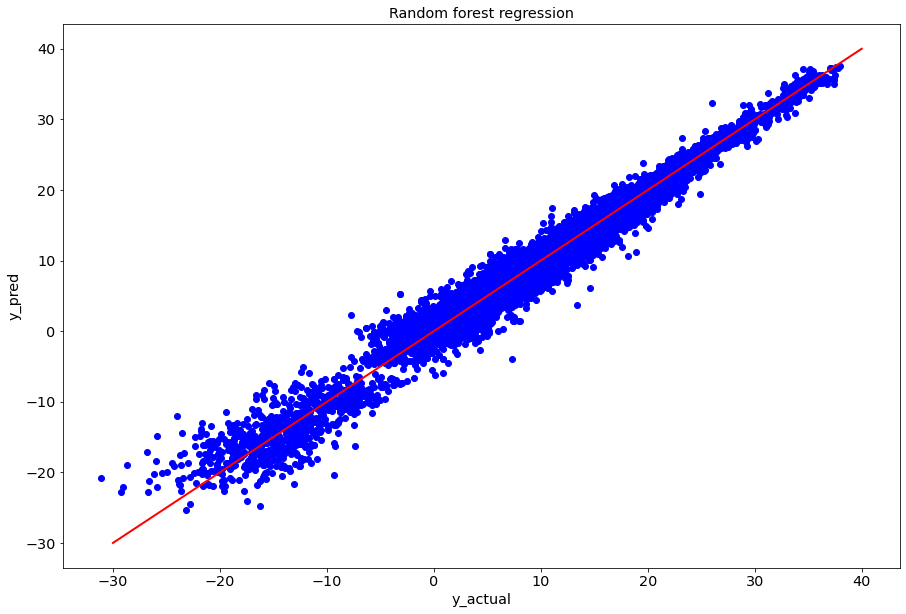

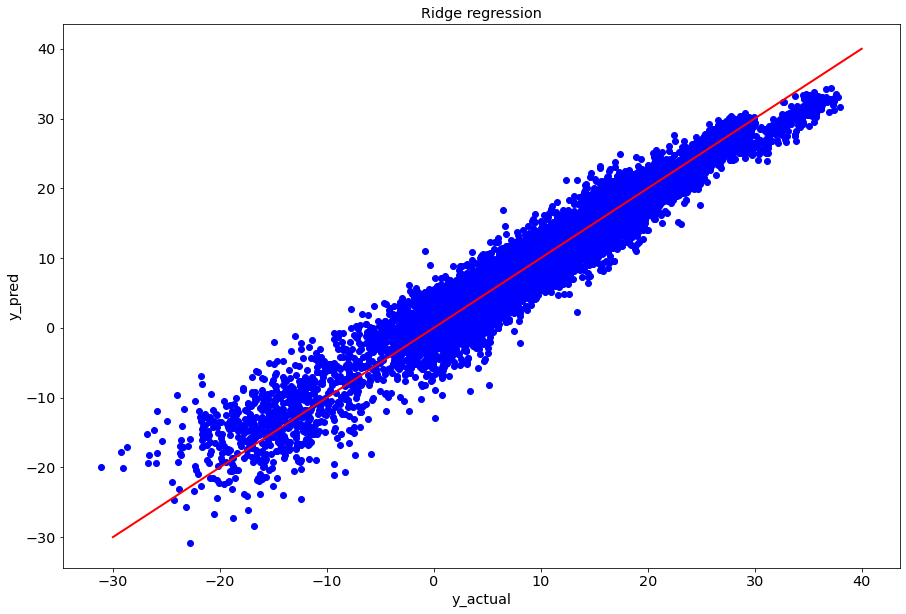

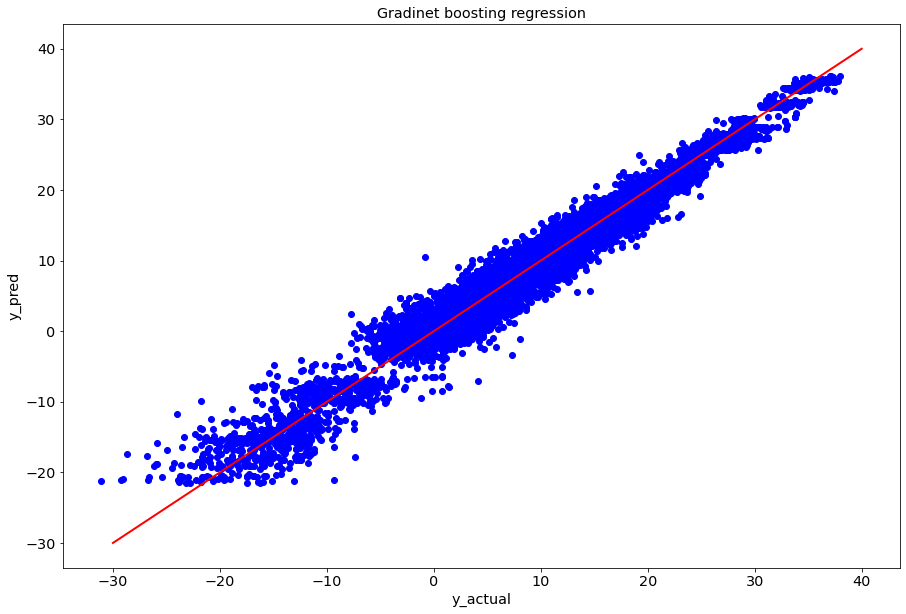

In [59]:
## Plotting 
plt.figure(figsize=(15, 10))
plt.plot(y_test, y_pred1, 'bo')
plt.plot([-30, 40], [-30, 40], color = 'red', linewidth = 2)
plt.xlabel('y_actual')
plt.ylabel('y_pred')
plt.title('Linear regression')
plt.show()

## Plotting 
plt.figure(figsize=(15, 10))

plt.plot(y_test, y_pred2, 'bo')
plt.plot([-30, 40], [-30, 40], color = 'red', linewidth = 2)
plt.xlabel('y_actual')
plt.ylabel('y_pred')
plt.title('Random forest regression')
plt.show()

# Plotting
plt.figure(figsize=(15, 10))
plt.plot(y_test,y_pred3, 'bo')
plt.plot([-30, 40], [-30, 40], color = 'red', linewidth = 2)
#plt.ylim(-.05,.05)
plt.xlabel('y_actual')
plt.ylabel('y_pred')
plt.title('Ridge regression')
plt.show()

# Plotting
plt.figure(figsize=(15, 10))
plt.plot(y_test,y_pred4, 'bo')
plt.plot([-30, 40], [-30, 40], color = 'red', linewidth = 2)
#plt.ylim(-.05,.05)
plt.xlabel('y_actual')
plt.ylabel('y_pred')
plt.title('Gradinet boosting regression')
plt.show()



# Generating Prediction
* We Choose the model with best r2 score

In [46]:
def predict_temp(city, end_date = '2013-12-1'):
    """
    input: city, and end_date = date upto which we want prediction
    output: gives temparature predictions, per month, upto the end_date
    """
    l =[]
    k=1
    dfc = df_city[df_city.City == city]
    dfc = dfc.sort_values('dt')
    v = np.array(dfc.AverageTemperature[-5:])
    b = dfc[['longi', 'latti']].iloc[0]
    date = dfc.dt.max() + pd.DateOffset(months=k)
    while date <= pd.to_datetime(end_date):
        x = np.append(v, b)
        x = x.reshape(1, -1)
        p = reg2.predict(x)
        p = round(float(p),2)
        date = dfc.dt.max() + pd.DateOffset(months=k)        
        l.append((date.strftime("%Y-%m-%d"),p))
        v = np.append(v,p)
        v = np.delete(v, 0)
        k = k+1
        date = dfc.dt.max() + pd.DateOffset(months=k)                        
    return city, l

In [47]:
for city in top_cities:
    print("Tempareture prediction for:", city)
    print(predict_temp(city))

Tempareture prediction for: Ternate
('Ternate', [('2013-10-01', 27.3), ('2013-11-01', 28.12), ('2013-12-01', 29.16)])
Tempareture prediction for: Bitung
('Bitung', [('2013-10-01', 26.77), ('2013-11-01', 27.42), ('2013-12-01', 28.57)])
Tempareture prediction for: Manado
('Manado', [('2013-10-01', 26.77), ('2013-11-01', 27.42), ('2013-12-01', 28.57)])
Tempareture prediction for: Baturaja
('Baturaja', [('2013-10-01', 25.88), ('2013-11-01', 26.56), ('2013-12-01', 26.95)])


In [48]:
predict_temp("Zwolle")

('Zwolle', [('2013-10-01', 14.16), ('2013-11-01', 9.08), ('2013-12-01', 4.0)])